In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob


In [8]:
# Load one of your generated temperature files
files = sorted(glob.glob("../data/ising_L32_T*.npy"))
print(f"Found {len(files)} temperature datasets")

# Pick one, e.g. the low temperature (ordered) and high temperature (disordered)
lowT = np.load(files[0])     # T ≈ 1.0
highT = np.load(files[-1])   # T ≈ 4.0

print("Low T shape:", lowT.shape)
print("High T shape:", highT.shape)

a = np.array(files[0])
print(a)

Found 11 temperature datasets
Low T shape: (100, 32, 32)
High T shape: (100, 32, 32)
../data/ising_L32_T1.00.npy


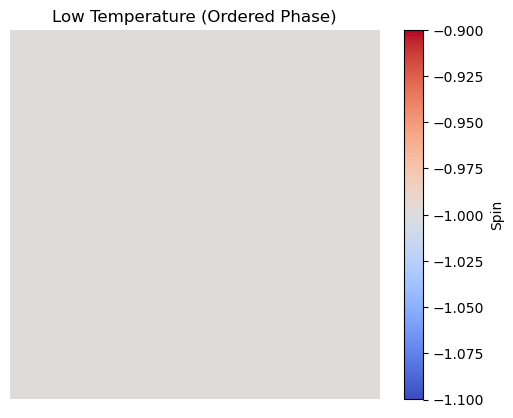

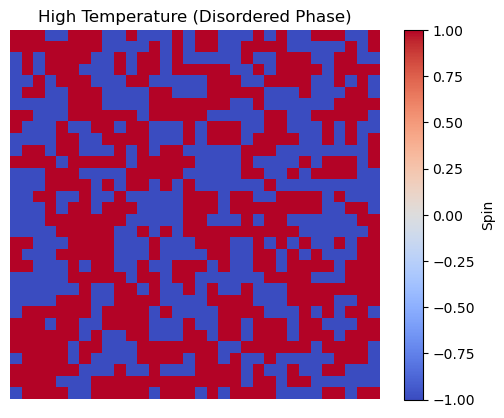

In [9]:
def show_lattice(lattice, title="Ising configuration"):
    plt.imshow(lattice, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label="Spin")
    plt.title(title)
    plt.axis("off")
    plt.show()

# Display a few random configurations
show_lattice(lowT[4], title="Low Temperature (Ordered Phase)")
show_lattice(highT[0], title="High Temperature (Disordered Phase)")


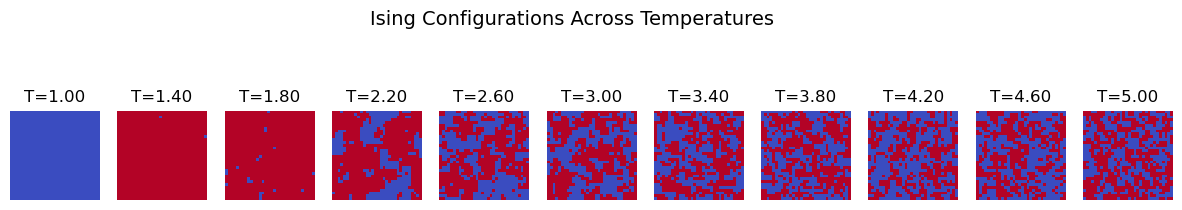

In [10]:
fig, axes = plt.subplots(1,11, figsize=(15, 3))
temps = np.linspace(1.0, 5.0, 11)

for ax, T in zip(axes, temps):
    data = np.load(f"../data/ising_L32_T{T:.2f}.npy")
    ax.imshow(data[0], cmap='coolwarm', interpolation='nearest')
    ax.set_title(f"T={T:.2f}")
    ax.axis('off')

plt.suptitle("Ising Configurations Across Temperatures", fontsize=14)
plt.show()



In [14]:
avg_mags=[]

for f in files:
    configs = np.load(f)
    mags = np.mean(np.abs(np.mean(configs,axis=(1,2))))
    avg_mags.append(mags)
    

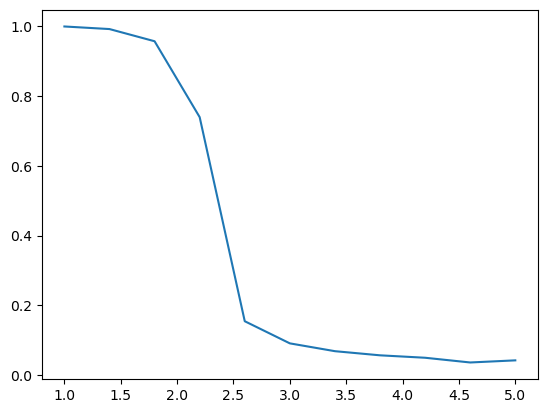

In [15]:
plt.plot(temps,avg_mags)